## AHRS demo intro

Author:　Ｈsiu-Wen Chang
Date: 2022.06.07

### wahba's problem


In [19]:
%matplotlib notebook 

import numpy as np
import glob
import os
import matplotlib.pyplot as plt
# Please pay attention to your path naming system
print(os.getcwd())

/mnt/c/Users/Kelly/Desktop/XW_NCKU project/python/ahrs_robust


Dataset collected on April, 4, 2022

Activity: jogging on treadmill

device: OSMIMU, MIMU22BL

format: PKT_No. 	    TimeStamp 	    ax(m/s^2) 	    ay(m/s^2) 	    az(m/s^2) 	    gx(rad/s) 	    gy(rad/s) 	    gz(rad/s) 	       mx(μT) 	       my(μT) 	       mz(μT) 

Allocation of 4 IMUs 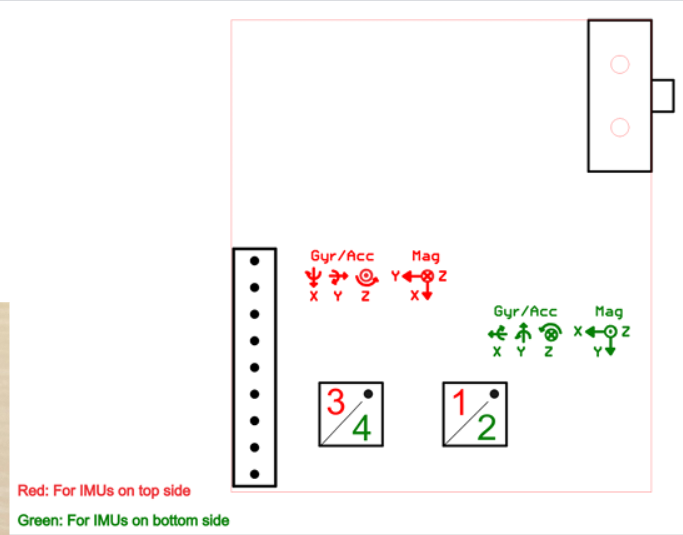



In [20]:
file_root = '../../data/20220414_NCKU_GYM/Data'
files_sequence = os.listdir(file_root)
#P1211: right wrist, 4 imu array
#P1213: left wrist,  1 imu array
#P1214: left wrist, 4 imu array
print(files_sequence)


['P1211', 'P1213', 'P1214', 'ReadME.md.docx']


In [21]:
# practice to get all txt files
counter = 0
for sequence in files_sequence:
    if os.path.isdir(os.path.join(file_root,sequence)):
        files_path = glob.glob(os.path.join(file_root,sequence,'*.txt'))
        counter += len(files_path)
        print(files_path)
print('Total imu files:', counter)


['../../data/20220414_NCKU_GYM/Data/P1211/62.5Hz_20220414_160845.txt', '../../data/20220414_NCKU_GYM/Data/P1211/62.5Hz_20220414_162003.txt', '../../data/20220414_NCKU_GYM/Data/P1211/62.5Hz_20220414_162731.txt', '../../data/20220414_NCKU_GYM/Data/P1211/62.5Hz_20220414_163305.txt', '../../data/20220414_NCKU_GYM/Data/P1211/62.5Hz_20220414_165645.txt']
['../../data/20220414_NCKU_GYM/Data/P1213/62.5Hz_20220414_160844.txt', '../../data/20220414_NCKU_GYM/Data/P1213/62.5Hz_20220414_162003.txt', '../../data/20220414_NCKU_GYM/Data/P1213/62.5Hz_20220414_162732.txt', '../../data/20220414_NCKU_GYM/Data/P1213/62.5Hz_20220414_163306.txt', '../../data/20220414_NCKU_GYM/Data/P1213/62.5Hz_20220414_165642.txt']
['../../data/20220414_NCKU_GYM/Data/P1214/62.5Hz_20220414_160833.txt', '../../data/20220414_NCKU_GYM/Data/P1214/62.5Hz_20220414_161951.txt', '../../data/20220414_NCKU_GYM/Data/P1214/62.5Hz_20220414_162720.txt', '../../data/20220414_NCKU_GYM/Data/P1214/62.5Hz_20220414_163254.txt', '../../data/20220

In [22]:
# path: C:\Users\Kelly\Desktop\XW_NCKU project\data\20220414_NCKU_GYM\Data\P1211
seq = files_path = glob.glob(os.path.join(file_root,files_sequence[0],'*.txt'))
imu = np.genfromtxt(seq[0], skip_header=3)

In [23]:
print(imu.shape)

(16415, 11)


In [24]:
imu[0]

array([ 1.0000000e+00,  1.6000000e-02,  2.1850600e-01, -6.4992630e+00,
        6.7524370e+00,  3.7392400e-01,  5.3228000e-02, -1.6870100e-01,
        3.7350563e+01, -2.9100565e+01,  3.6450565e+01])

In [25]:
def draw_raw_data(imu):
    fig, axs = plt.subplots(3, 1, sharex=True)
    axs[0].set(ylabel='accel (m/s/s)', title='MIMU reading')
    axs[1].set(ylabel='gyro (rad/s)')
    axs[2].set(xlabel='$t$ (s)', ylabel='mag (microtesla)')

    for i in range(3):
        axs[i].plot(imu[:,1], imu[:,2+i*3], label='x')
        axs[i].plot(imu[:,1], imu[:,3+i*3], label='y')
        axs[i].plot(imu[:,1], imu[:,4+i*3], label='z')
        axs[i].grid()
        axs[i].legend()

    plt.show()
    
def draw_attitude(ahrs):
    fig, axs = plt.subplot(3,1,sharex=True)
    axs[0].plot(ahrs[:,0], ahrs[:,1],ylabel='roll (deg)',title='Attitude')
    axs[1].plot(ahrs[:,0], ahrs[:,2],ylabel='pitch (deg)')
    axs[2].plot(ahrs[:,0], ahrs[:,3],ylabel='yaw (deg)')
    for i in range(3):
        axs[i].grid()
    plt.show()
    

<IPython.core.display.Javascript object>


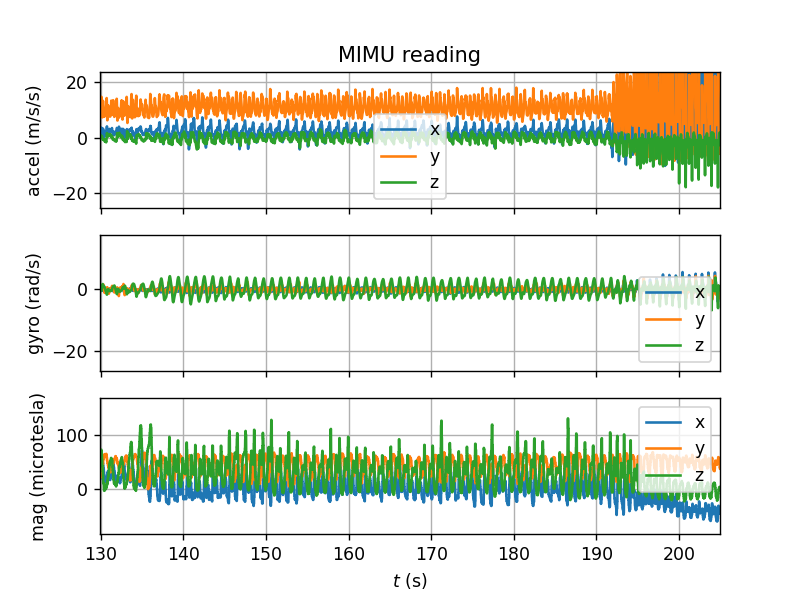

In [26]:
# 3 km/hr: 72.5 s to 135 s
# 6 km/hr: 135 s to 192 s
# 10 km/hr: 192 s to 253.5 s
draw_raw_data(imu)

# AQUA: algebraic quaternion algorithm
Concept: [AQUA](https://res.mdpi.com/sensors/sensors-15-19302/article_deploy/sensors-15-19302.pdf) estimate the attitude with the algebraic solution of system from inertial/magnetic observation. It use accelerometer to compute the tilt quaternion (levelling) and the heading quaternion (north direction) by magnetometer. The key advantage of AQUA is the independence of two sub-parts of tilt quaterinion and heading quaternion. By sepearating the computation, it avoids the impact of magnetic disturbances on the roll and pitch estimation. 

In [10]:
time_start = 72.5
time_end = 253.5
imu2 = imu[(imu[:,1]>time_start) & (imu[:,1]<time_end),:]


<IPython.core.display.Javascript object>


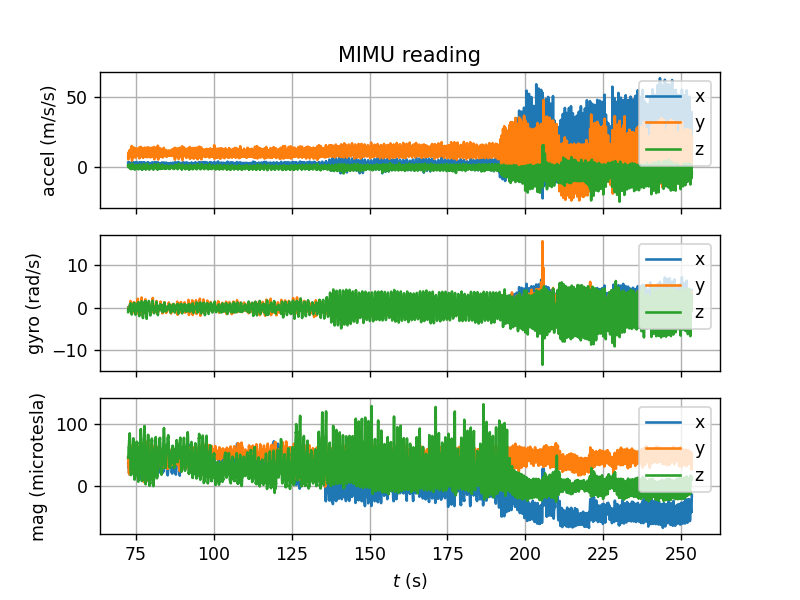

In [11]:
draw_raw_data(imu2)

In [12]:
import ahrs

In [13]:
attitude = ahrs.filters.Madgwick(acc=imu2[:,2:5], gyr=imu2[:,2:5])

In [18]:
attitude.Q.shape

(11312, 4)

In [16]:
draw_attitude(np.concatenate((imu[:,1],attitude), axis = 1))

AxisError: axis 1 is out of bounds for array of dimension 1